# Main Idea 

We are working for an advertizing company that has recently got a task to Advirtize a sports product in germany. They require their data scientist to create a map that on hovering gives the population of 15 to 34 years of age of people in each state of germany. This data set will help the company to analyze the flow of product they have to maintain and to do analysis on the profitability of the project.
Use red color and cloud icon for above 1 milion population 

# Data Set
Two datasets are chosen one will give the geographical measures of the state of germany and the seccond will give the information about

1. State : Target state (total states are 16).
2. Gender : Male or female (will help because there are more men in sports).
3. age : we need data for 15-34 years of age.
4. population: What is the target population.

# Cleansing our data
our next goal will be to cleanse the data to make it useable.
we have to extract out information about the specific age group of people and make another data set and concatinate this dataset with the geo_data set consisting of information about the location.

# Making map
we will make a map using Python Folium package.


In [8]:
import pandas as pd
demographic_info = pd.read_csv("demographics_de.csv")
demographic_info

,state,gender,age_group,population
0,Baden-Wuerttemberg,female,00-04,261674
1,Baden-Wuerttemberg,female,05-14,490822
2,Baden-Wuerttemberg,female,15-34,1293488
3,Baden-Wuerttemberg,female,35-59,1919649
4,Baden-Wuerttemberg,female,60-79,1182736
...,...,...,...,...
187,Thueringen,male,05-14,92545
188,Thueringen,male,15-34,214553
189,Thueringen,male,35-59,384822
190,Thueringen,male,60-79,264189


# Data Type

In [9]:
# So now i am going to view the data type of each column
demographic_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   state       192 non-null    object
 1   gender      192 non-null    object
 2   age_group   192 non-null    object
 3   population  192 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.1+ KB


# Cleansing the data

In [10]:
filtered_info = pd.DataFrame(demographic_info[demographic_info["age_group"]=="15-34"]) # Filtering age 15-34
filtered_info = filtered_info.reset_index() # Reset index
filtered_info = filtered_info.drop("index",axis=1)
filtered_info = filtered_info.drop(labels=26,axis=0) # Deleting Rows
filtered_info = filtered_info.drop(labels=27,axis=0)
filtered_info = filtered_info.reset_index()
filtered_info

,index,state,gender,age_group,population
0,0,Baden-Wuerttemberg,female,15-34,1293488
1,1,Baden-Wuerttemberg,male,15-34,1423367
2,2,Bayern,female,15-34,1507659
3,3,Bayern,male,15-34,1639500
4,4,Berlin,female,15-34,477479
5,5,Berlin,male,15-34,484613
6,6,Brandenburg,female,15-34,213065
7,7,Brandenburg,male,15-34,233079
8,8,Bremen,female,15-34,83990
9,9,Bremen,male,15-34,91939


In [11]:
geo_data = pd.read_csv("filt.csv") # Importing geo data
geo_data

,Longitude,Latitude
0,9.047710,48.540390
1,9.047710,48.540390
2,-73.972496,40.756851
3,-73.972496,40.756851
4,13.404954,52.520008
5,13.404954,52.520008
6,13.216249,52.131393
7,13.216249,52.131393
8,8.801694,53.079296
9,8.801694,53.079296


In [12]:
from operator import index
Final_data = filtered_info.join(geo_data) # Joining the filtered data and geo data
Final_data=Final_data[Final_data["gender"]=="male"]
Final_data=Final_data.reset_index()
Final_data=Final_data.drop("level_0",axis=1) # Removing Extra index columns
Final_data =Final_data.drop("index",axis=1)
Final_data

,state,gender,age_group,population,Longitude,Latitude
0,Baden-Wuerttemberg,male,15-34,1423367,9.047710,48.540390
1,Bayern,male,15-34,1639500,-73.972496,40.756851
2,Berlin,male,15-34,484613,13.404954,52.520008
3,Brandenburg,male,15-34,233079,13.216249,52.131393
4,Bremen,male,15-34,91939,8.801694,53.079296
5,Hamburg,male,15-34,248102,9.993682,53.551086
6,Hessen,male,15-34,767238,9.004440,50.526501
7,Mecklenburg-Vorpommern,male,15-34,160846,12.503040,53.897369
8,Niedersachsen,male,15-34,956570,9.126210,52.593342
9,Nordrhein-Westfalen,male,15-34,2188068,7.663980,51.426998


# Generating General Map

In [13]:
import folium
map = folium.Map(location=[51.165691,10.451526], zoom_start=6) # setting center of map

In [14]:
l=len(Final_data["Latitude"])

In [15]:
# Making a loop that adds markers to the map such that greater than 1 moilion population has red marker and cloud sign
for i in range(l): 
  if Final_data.population[i]<1000000:
      folium.Marker(location=[Final_data.Latitude[i],Final_data.Longitude[i]],popup=Final_data.state[i]).add_to(map)
  else:
      folium.Marker(location=[Final_data.Latitude[i],Final_data.Longitude[i]],popup=Final_data.state[i],icon=folium.Icon(icon="cloud",color="red")).add_to(map)

In [16]:
map

# Generating Cluster Map

In [17]:
# adding a cluster layer to the map
from folium.plugins import MarkerCluster
map_1 = folium.Map(location=[51.165691,10.451526],zoom_start=5) # setting center location
cluster_layer = MarkerCluster(name="Cluster").add_to(map_1)

In [18]:
# adding markers to the cluster
for i in range(l):
  if Final_data.population[i]<1000000:
      folium.Marker(location=[Final_data.Latitude[i],Final_data.Longitude[i]],popup=Final_data.state[i]).add_to(cluster_layer)
  else:
      folium.Marker(location=[Final_data.Latitude[i],Final_data.Longitude[i]],popup=Final_data.state[i],icon=folium.Icon(icon="cloud",color="red")).add_to(cluster_layer)

In [19]:
map_1

# Generating Heat Map

In [20]:
# Making a heat map layer on the map and passing data to it 
from folium.plugins import HeatMap
map_2 = folium.Map(location=[51.165691,10.451526],zoom_start=6)
data = []
# writing a loop to make formated data for the heat map
for i in range(l):
  data.append([Final_data.Latitude[i],Final_data.Longitude[i]])
HeatMap(data=data,radius=10).add_to(map_2) # passing the data to heat map and setting the radius of hotspot
map_2

# Statistical Analysis

In [21]:
import matplotlib.pyplot as plt

In [28]:
labels = []
for i in Final_data.state:
  labels.append(str(i))
labels

['Baden-Wuerttemberg',
 'Bayern',
 'Berlin',
 'Brandenburg',
 'Bremen',
 'Hamburg',
 'Hessen',
 'Mecklenburg-Vorpommern',
 'Niedersachsen',
 'Nordrhein-Westfalen',
 'Rheinland-Pfalz',
 'Saarland',
 'Sachsen',
 'Schleswig-Holstein',
 'Thueringen']

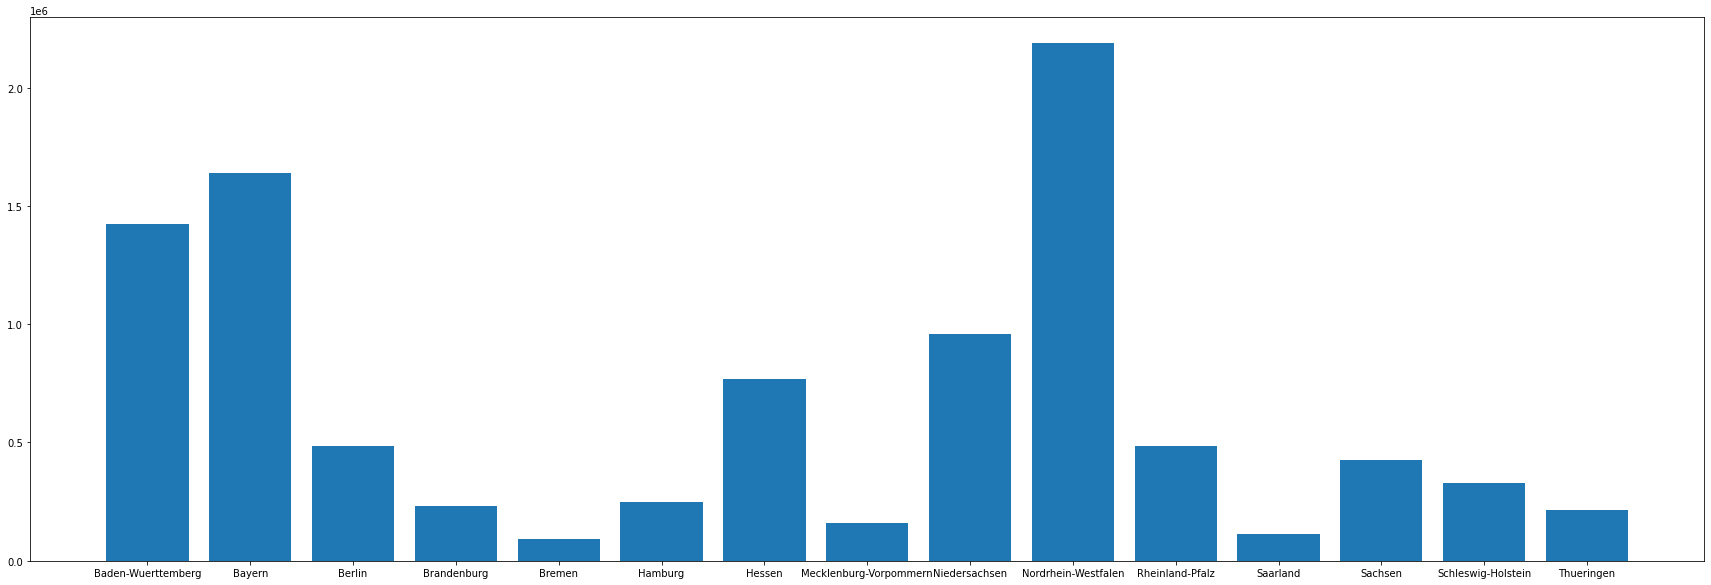

In [57]:
import numpy as np
from PIL.Image import ROTATE_90
# Finding statistics of population depending on data
fig = plt.figure(figsize=(30,10))
ax=fig.add_subplot()
ax.bar(height=Final_data.population,x=labels);

In [58]:
# From here it is clear that the area with best target population is Nordrhein